In [2]:
import os, sys
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas
import gzip

sys.path.append("../../svcca")
import cca_core

In [3]:
def _plot_helper(arr, xlabel, ylabel):
    plt.plot(arr, lw=2.0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

In [4]:
# Toy Example of CCA in action

# assume X_fake has 100 neurons and we have their activations on 1000 datapoints
A_fake = np.random.randn(100, 2000)
# Y_fake has 50 neurons with activations on the same 1000 datapoints
# Note X and Y do *not* have to have the same number of neurons
B_fake = np.random.randn(50, 2000)

# computing CCA simliarty between X_fake, Y_fake
# We expect similarity should be very low, because the fake activations are not correlated
results = cca_core.get_cca_similarity(A_fake, B_fake, verbose=True)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


In [5]:
print("Returned Information:")
print(results.keys())

Returned Information:
dict_keys(['coef_x', 'invsqrt_xx', 'full_coef_x', 'full_invsqrt_xx', 'coef_y', 'invsqrt_yy', 'full_coef_y', 'full_invsqrt_yy', 'neuron_means1', 'neuron_means2', 'cca_coef1', 'cca_coef2', 'x_idxs', 'y_idxs', 'mean', 'sum'])


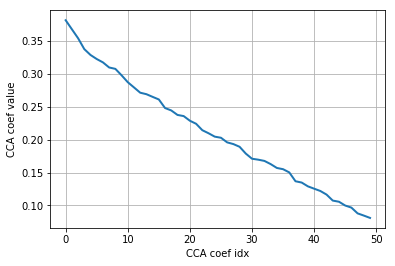

In [6]:
# correlation coefficients
_plot_helper(results["cca_coef1"], "CCA coef idx", "CCA coef value")

In [7]:
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results["cca_coef1"])))

Single number for summarizing similarity
0.2106


In [8]:
At_fake = np.dot(np.random.randn(100, 100), A_fake)

results_t = cca_core.get_cca_similarity(A_fake, At_fake)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


Single number for summarizing similarity
1.0000


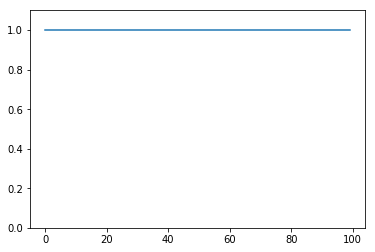

In [9]:
plt.plot(results_t["cca_coef1"])
plt.ylim((0,1.1))
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results_t["cca_coef1"])))